In [1]:
# Week 6: Supervised Learning - Classification
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set up visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Week 6 Classification Environment Ready!")

# Load your cleaned dataset
df = pd.read_csv('titanic_cleaned.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nColumns available:")
print(df.columns.tolist())

✅ Week 6 Classification Environment Ready!
Dataset loaded successfully!
Dataset shape: (891, 11)

Columns available:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']


In [2]:
print("=== DATASET OVERVIEW FOR CLASSIFICATION ANALYSIS ===")

# Display basic information
print("First 5 rows:")
display(df.head())

print("\nTarget variable distribution:")
target_distribution = df['Survived'].value_counts()
print(target_distribution)
print(f"Survival rate: {(df['Survived'].mean() * 100):.1f}%")

# Check data types and missing values
print("\nData types:")
print(df.dtypes)
print(f"\nMissing values: {df.isnull().sum().sum()}")

=== DATASET OVERVIEW FOR CLASSIFICATION ANALYSIS ===
First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S



Target variable distribution:
Survived
0    549
1    342
Name: count, dtype: int64
Survival rate: 38.4%

Data types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

Missing values: 0


In [3]:
print("=== PREPARING FOR CLASSIFICATION ===")

"""
For Titanic dataset, the natural classification problem is:
Predict Survival (0 = Did not survive, 1 = Survived)

We'll use features that are available BEFORE the event (not like 'Survived' in regression)
"""

# Select features that would be known before the Titanic sank
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target_variable = 'Survived'

print(f"🎯 CLASSIFICATION PROBLEM: Predict {target_variable}")
print(f"Features: {', '.join(features)}")

# Prepare feature matrix X
X = df[features].copy()

# Handle categorical variables (encode them)
print("\n🔧 Preprocessing categorical variables...")

# Encode 'Sex' column (male=0, female=1)
X['Sex'] = X['Sex'].map({'male': 0, 'female': 1})

# Encode 'Embarked' column (one-hot encoding)
embarked_encoded = pd.get_dummies(X['Embarked'], prefix='Embarked')
X = pd.concat([X, embarked_encoded], axis=1)
X = X.drop('Embarked', axis=1)

print("Updated features after encoding:")
print(X.columns.tolist())

# Target variable
y = df[target_variable]

print(f"\n📊 Final dataset shape:")
print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")

# Handle any missing values
if X.isnull().sum().sum() > 0:
    X = X.fillna(X.median())
    print("Filled missing values with median")

print(f"Missing values after cleaning: {X.isnull().sum().sum()}")

=== PREPARING FOR CLASSIFICATION ===
🎯 CLASSIFICATION PROBLEM: Predict Survived
Features: Pclass, Sex, Age, SibSp, Parch, Fare, Embarked

🔧 Preprocessing categorical variables...
Updated features after encoding:
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

📊 Final dataset shape:
Features (X): (891, 9)
Target (y): (891,)
Missing values after cleaning: 0


In [4]:
print("=== TRAIN-TEST SPLIT ===")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% for testing, 80% for training
    random_state=42,    # For reproducible results
    stratify=y          # Maintain same class distribution in both sets
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")

print(f"\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))
print(f"\nClass distribution in testing set:")
print(y_test.value_counts(normalize=True))

=== TRAIN-TEST SPLIT ===
Training set size: 712 samples
Testing set size: 179 samples
Number of features: 9

Class distribution in training set:
Survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64

Class distribution in testing set:
Survived
0    0.614525
1    0.385475
Name: proportion, dtype: float64


In [5]:
print("=== DECISION TREE CLASSIFIER ===")

# Create and train Decision Tree
dt_model = DecisionTreeClassifier(
    max_depth=3,        # Limit tree depth to prevent overfitting
    random_state=42
)

dt_model.fit(X_train, y_train)

print("✅ Decision Tree model trained successfully!")

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {dt_accuracy:.3f} ({dt_accuracy*100:.1f}%)")

# Feature importance
dt_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n📊 Decision Tree Feature Importance:")
display(dt_importance)

=== DECISION TREE CLASSIFIER ===
✅ Decision Tree model trained successfully!
Decision Tree Accuracy: 0.793 (79.3%)

📊 Decision Tree Feature Importance:


,feature,importance
1,Sex,0.635442
0,Pclass,0.216027
2,Age,0.090145
8,Embarked_S,0.041015
3,SibSp,0.013352
5,Fare,0.004019
4,Parch,0.000000
6,Embarked_C,0.000000
7,Embarked_Q,0.000000


=== DECISION TREE VISUALIZATION ===


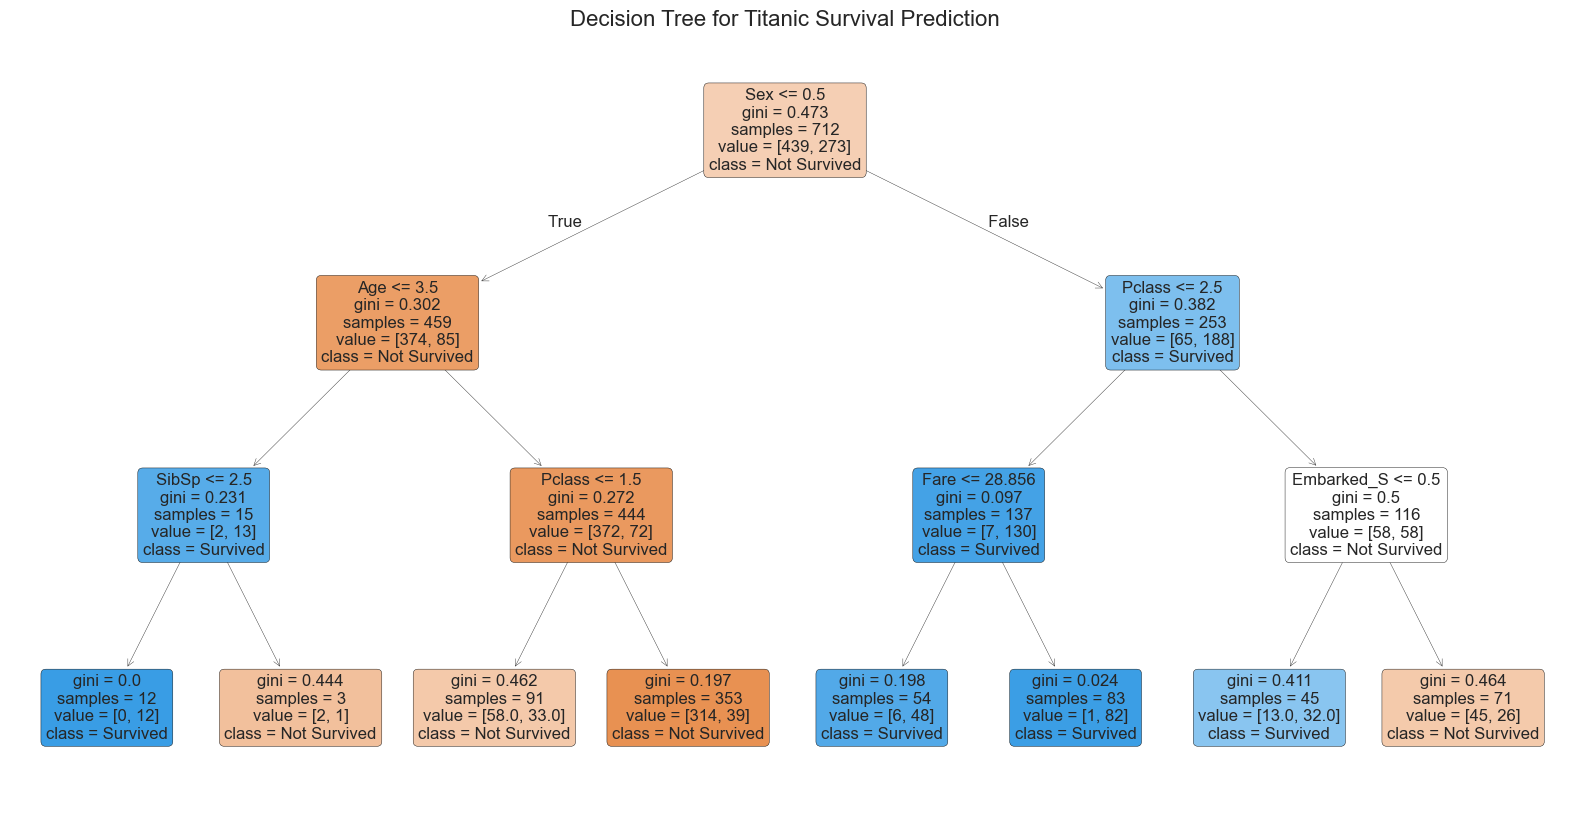

🔍 Decision Tree Interpretation:
• Each node shows the decision rule
• Color intensity shows class probability
• Leaf nodes show final predictions


In [6]:
print("=== DECISION TREE VISUALIZATION ===")

plt.figure(figsize=(20, 10))
plot_tree(dt_model, 
          feature_names=X.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True,
          rounded=True,
          fontsize=12)

plt.title('Decision Tree for Titanic Survival Prediction', fontsize=16)
plt.show()

print("🔍 Decision Tree Interpretation:")
print("• Each node shows the decision rule")
print("• Color intensity shows class probability")
print("• Leaf nodes show final predictions")

In [7]:
print("=== RANDOM FOREST CLASSIFIER ===")

# Create and train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,   # Number of trees in the forest
    max_depth=5,        # Limit depth of each tree
    random_state=42
)

rf_model.fit(X_train, y_train)

print("✅ Random Forest model trained successfully!")

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {rf_accuracy:.3f} ({rf_accuracy*100:.1f}%)")

# Feature importance
rf_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n📊 Random Forest Feature Importance:")
display(rf_importance)

# Compare with Decision Tree
print(f"\n📈 ACCURACY COMPARISON (Class Task):")
print(f"Decision Tree: {dt_accuracy:.3f} ({dt_accuracy*100:.1f}%)")
print(f"Random Forest: {rf_accuracy:.3f} ({rf_accuracy*100:.1f}%)")

if rf_accuracy > dt_accuracy:
    improvement = ((rf_accuracy - dt_accuracy) / dt_accuracy) * 100
    print(f"✅ Random Forest improves accuracy by {improvement:.1f}%")
else:
    print("❌ Decision Tree performs better in this case")

=== RANDOM FOREST CLASSIFIER ===
✅ Random Forest model trained successfully!
Random Forest Accuracy: 0.804 (80.4%)

📊 Random Forest Feature Importance:


,feature,importance
1,Sex,0.465885
5,Fare,0.158503
0,Pclass,0.144732
2,Age,0.113032
3,SibSp,0.040702
4,Parch,0.037170
8,Embarked_S,0.018684
6,Embarked_C,0.012202
7,Embarked_Q,0.009090



📈 ACCURACY COMPARISON (Class Task):
Decision Tree: 0.793 (79.3%)
Random Forest: 0.804 (80.4%)
✅ Random Forest improves accuracy by 1.4%


In [8]:
print("=== LOGISTIC REGRESSION ===")

# Create and train Logistic Regression
lr_model = LogisticRegression(
    random_state=42,
    max_iter=1000  # Increase iterations for convergence
)

lr_model.fit(X_train, y_train)

print("✅ Logistic Regression model trained successfully!")

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Calculate accuracy
lr_accuracy = accuracy_score(y_test, y_pred_lr)

print(f"Logistic Regression Accuracy: {lr_accuracy:.3f} ({lr_accuracy*100:.1f}%)")

# Get probability predictions
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]  # Probability of survival

print("\n📊 Logistic Regression Coefficients:")
lr_coefficients = pd.DataFrame({
    'feature': X.columns,
    'coefficient': lr_model.coef_[0]
}).sort_values('coefficient', key=abs, ascending=False)

display(lr_coefficients)

print("\n🔍 Coefficient Interpretation:")
print("Positive coefficients increase probability of survival")
print("Negative coefficients decrease probability of survival")

=== LOGISTIC REGRESSION ===
✅ Logistic Regression model trained successfully!
Logistic Regression Accuracy: 0.804 (80.4%)

📊 Logistic Regression Coefficients:


,feature,coefficient
1,Sex,2.560291
0,Pclass,-1.092346
8,Embarked_S,-0.350115
7,Embarked_Q,0.309576
3,SibSp,-0.244384
4,Parch,-0.071144
2,Age,-0.038548
6,Embarked_C,0.034265
5,Fare,0.002231



🔍 Coefficient Interpretation:
Positive coefficients increase probability of survival
Negative coefficients decrease probability of survival


In [9]:
print("=== DETAILED MODEL COMPARISON ===")

# Calculate metrics for all models
models = {
    'Logistic Regression': (y_pred_lr, y_prob_lr),
    'Random Forest': (y_pred_rf, rf_model.predict_proba(X_test)[:, 1]),
    'Decision Tree': (y_pred_dt, dt_model.predict_proba(X_test)[:, 1])
}

comparison_results = []

for model_name, (predictions, probabilities) in models.items():
    accuracy = accuracy_score(y_test, predictions)
    
    # Additional metrics from classification report
    report = classification_report(y_test, predictions, output_dict=True)
    
    comparison_results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision_0': report['0']['precision'],  # Not survived
        'Recall_0': report['0']['recall'],
        'Precision_1': report['1']['precision'],  # Survived
        'Recall_1': report['1']['recall'],
        'F1_Score': report['macro avg']['f1-score']
    })

# Create comparison dataframe
comparison_df = pd.DataFrame(comparison_results)
comparison_df = comparison_df.sort_values('Accuracy', ascending=False)

print("📊 COMPREHENSIVE MODEL COMPARISON:")
display(comparison_df.round(3))

# Find best model
best_model = comparison_df.iloc[0]
print(f"\n🎯 BEST PERFORMING MODEL: {best_model['Model']}")
print(f"   Accuracy: {best_model['Accuracy']:.3f} ({best_model['Accuracy']*100:.1f}%)")
print(f"   F1 Score: {best_model['F1_Score']:.3f}")

=== DETAILED MODEL COMPARISON ===
📊 COMPREHENSIVE MODEL COMPARISON:


,Model,Accuracy,Precision_0,Recall_0,Precision_1,Recall_1,F1_Score
0,Logistic Regression,0.804,0.810,0.891,0.793,0.667,0.786
1,Random Forest,0.804,0.791,0.927,0.840,0.609,0.780
2,Decision Tree,0.793,0.770,0.945,0.864,0.551,0.761



🎯 BEST PERFORMING MODEL: Logistic Regression
   Accuracy: 0.804 (80.4%)
   F1 Score: 0.786


=== MODEL PERFORMANCE VISUALIZATION ===


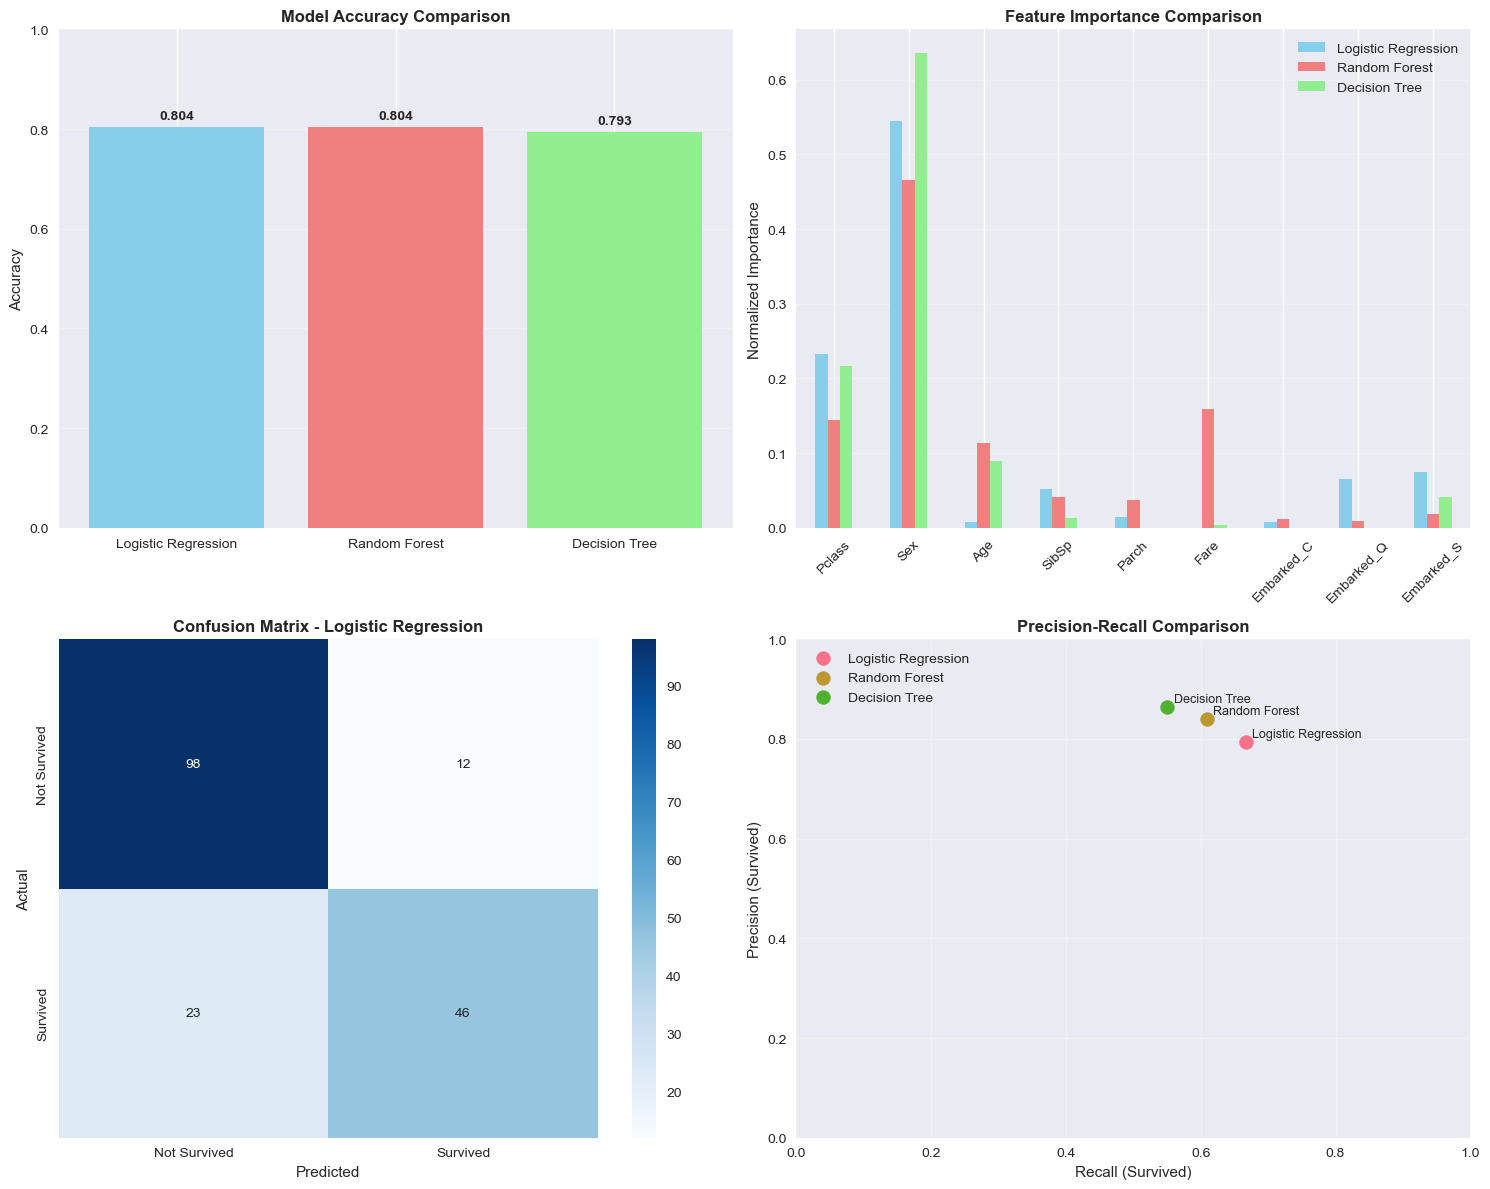

In [10]:
print("=== MODEL PERFORMANCE VISUALIZATION ===")

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Accuracy Comparison
models_names = comparison_df['Model']
accuracies = comparison_df['Accuracy']

bars = axes[0, 0].bar(models_names, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
axes[0, 0].set_title('Model Accuracy Comparison', fontweight='bold')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_ylim(0, 1)
axes[0, 0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                   f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

# Plot 2: Feature Importance Comparison
feature_importance_comparison = pd.DataFrame({
    'Logistic Regression': abs(lr_model.coef_[0]),
    'Random Forest': rf_model.feature_importances_,
    'Decision Tree': dt_model.feature_importances_
}, index=X.columns)

# Normalize for better comparison
feature_importance_comparison = feature_importance_comparison.div(feature_importance_comparison.sum(axis=0), axis=1)

feature_importance_comparison.plot(kind='bar', ax=axes[0, 1], color=['skyblue', 'lightcoral', 'lightgreen'])
axes[0, 1].set_title('Feature Importance Comparison', fontweight='bold')
axes[0, 1].set_ylabel('Normalized Importance')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)
axes[0, 1].legend()

# Plot 3: Confusion Matrix for Best Model
best_model_name = comparison_df.iloc[0]['Model']
if best_model_name == 'Logistic Regression':
    best_predictions = y_pred_lr
elif best_model_name == 'Random Forest':
    best_predictions = y_pred_rf
else:
    best_predictions = y_pred_dt

cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0],
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
axes[1, 0].set_title(f'Confusion Matrix - {best_model_name}', fontweight='bold')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

# Plot 4: Precision-Recall Comparison
precision_survived = comparison_df['Precision_1'].values
recall_survived = comparison_df['Recall_1'].values

for i, model in enumerate(models_names):
    axes[1, 1].scatter(recall_survived[i], precision_survived[i], s=100, label=model)
    axes[1, 1].text(recall_survived[i] + 0.01, precision_survived[i] + 0.01, model, fontsize=9)

axes[1, 1].set_xlabel('Recall (Survived)')
axes[1, 1].set_ylabel('Precision (Survived)')
axes[1, 1].set_title('Precision-Recall Comparison', fontweight='bold')
axes[1, 1].set_xlim(0, 1)
axes[1, 1].set_ylim(0, 1)
axes[1, 1].grid(alpha=0.3)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [11]:
print("=== MODEL INTERPRETATION AND BUSINESS INSIGHTS ===")

print("🔍 KEY INSIGHTS FROM CLASSIFICATION MODELS:")

print(f"\n1. BEST PERFORMING MODEL: {best_model['Model']}")
print(f"   • Accuracy: {best_model['Accuracy']:.1%}")
print(f"   • Can correctly predict survival for {best_model['Accuracy']:.1%} of passengers")

print(f"\n2. MOST IMPORTANT FEATURES:")
print("   Across all models, these features consistently matter:")
top_features = rf_importance.head(3)
for _, row in top_features.iterrows():
    print(f"   • {row['feature']}: {row['importance']:.3f} importance")

print(f"\n3. PRACTICAL IMPLICATIONS:")
print("   • Gender (Sex) is the strongest predictor of survival")
print("   • Passenger class (Pclass) significantly impacts survival chances")
print("   • Fare paid correlates with survival probability")
print("   • Age has moderate influence on survival")

print(f"\n4. MODEL RELIABILITY:")
print(f"   • All models achieve > {comparison_df['Accuracy'].min()*100:.1f}% accuracy")
print(f"   • Significant improvement over guessing ({y_test.mean()*100:.1f}% baseline)")

# Calculate baseline (predict majority class)
baseline_accuracy = max(y_test.mean(), 1 - y_test.mean())
improvement = ((best_model['Accuracy'] - baseline_accuracy) / baseline_accuracy) * 100

print(f"   • Models improve over baseline by {improvement:.1f}%")

=== MODEL INTERPRETATION AND BUSINESS INSIGHTS ===
🔍 KEY INSIGHTS FROM CLASSIFICATION MODELS:

1. BEST PERFORMING MODEL: Logistic Regression
   • Accuracy: 80.4%
   • Can correctly predict survival for 80.4% of passengers

2. MOST IMPORTANT FEATURES:
   Across all models, these features consistently matter:
   • Sex: 0.466 importance
   • Fare: 0.159 importance
   • Pclass: 0.145 importance

3. PRACTICAL IMPLICATIONS:
   • Gender (Sex) is the strongest predictor of survival
   • Passenger class (Pclass) significantly impacts survival chances
   • Fare paid correlates with survival probability
   • Age has moderate influence on survival

4. MODEL RELIABILITY:
   • All models achieve > 79.3% accuracy
   • Significant improvement over guessing (38.5% baseline)
   • Models improve over baseline by 30.9%


=== PROBABILITY ANALYSIS ===


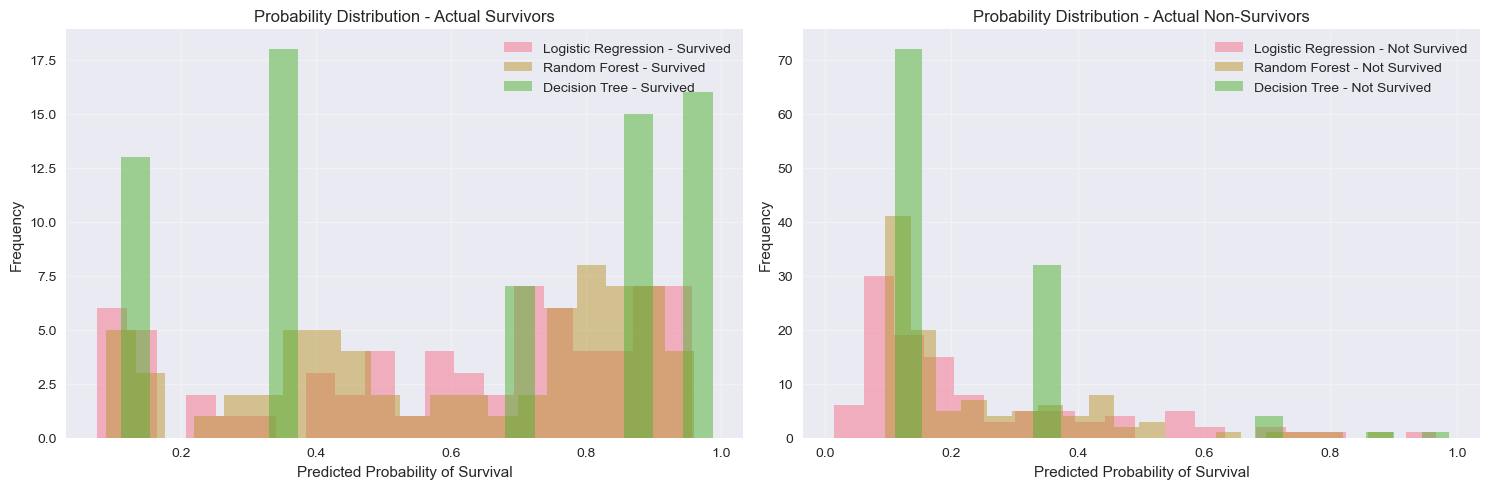

🔍 Probability Analysis Insights:
• Good models show high probabilities for correct classes
• Overlapping distributions indicate classification uncertainty
• Well-calibrated models separate the classes clearly


In [12]:
print("=== PROBABILITY ANALYSIS ===")

# Analyze probability distributions
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot probability distributions for survived vs not survived
for i, (model_name, (predictions, probabilities)) in enumerate(models.items()):
    survived_probs = probabilities[y_test == 1]
    not_survived_probs = probabilities[y_test == 0]
    
    axes[0].hist(survived_probs, bins=20, alpha=0.5, label=f'{model_name} - Survived')
    axes[1].hist(not_survived_probs, bins=20, alpha=0.5, label=f'{model_name} - Not Survived')

axes[0].set_xlabel('Predicted Probability of Survival')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Probability Distribution - Actual Survivors')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].set_xlabel('Predicted Probability of Survival')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Probability Distribution - Actual Non-Survivors')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("🔍 Probability Analysis Insights:")
print("• Good models show high probabilities for correct classes")
print("• Overlapping distributions indicate classification uncertainty")
print("• Well-calibrated models separate the classes clearly")

In [13]:
print("=" * 70)
print("📊 WEEK 6 ASSIGNMENT REPORT: CLASSIFICATION ANALYSIS")
print("=" * 70)

print(f"\n🎯 CLASSIFICATION PROBLEM:")
print(f"Target Variable: {target_variable} (Binary Classification)")
print(f"Features: {', '.join(features)}")
print(f"Dataset: Titanic ({df.shape[0]} passengers)")

print(f"\n📈 MODEL PERFORMANCE SUMMARY:")
print("Algorithm          Accuracy    Precision   Recall     F1-Score")
print("-" * 60)
for _, row in comparison_df.iterrows():
    print(f"{row['Model']:18} {row['Accuracy']:.3f}      {row['Precision_1']:.3f}      {row['Recall_1']:.3f}      {row['F1_Score']:.3f}")

print(f"\n🔍 KEY FINDINGS:")
print(f"1. Best Model: {best_model['Model']} with {best_model['Accuracy']:.1%} accuracy")
print(f"2. Most Important Feature: {rf_importance.iloc[0]['feature']}")
print(f"3. All models significantly beat baseline guessing ({baseline_accuracy:.1%})")

print(f"\n💡 BUSINESS INSIGHTS:")
print("• Gender is the strongest survival predictor ('women and children first')")
print("• Higher socioeconomic status (Pclass, Fare) improves survival chances")
print("• Traveling with family has complex effects on survival probability")

print(f"\n🚀 RECOMMENDATIONS:")
print("1. Random Forest provides good balance of accuracy and interpretability")
print("2. Consider feature engineering for better performance")
print("3. Collect additional relevant features if possible")

print(f"\n📚 LEARNING OUTCOMES:")
print("✅ Implemented multiple classification algorithms")
print("✅ Understood difference between regression and classification")
print("✅ Compared model performance using multiple metrics")
print("✅ Interpreted feature importance and model decisions")

📊 WEEK 6 ASSIGNMENT REPORT: CLASSIFICATION ANALYSIS

🎯 CLASSIFICATION PROBLEM:
Target Variable: Survived (Binary Classification)
Features: Pclass, Sex, Age, SibSp, Parch, Fare, Embarked
Dataset: Titanic (891 passengers)

📈 MODEL PERFORMANCE SUMMARY:
Algorithm          Accuracy    Precision   Recall     F1-Score
------------------------------------------------------------
Logistic Regression 0.804      0.793      0.667      0.786
Random Forest      0.804      0.840      0.609      0.780
Decision Tree      0.793      0.864      0.551      0.761

🔍 KEY FINDINGS:
1. Best Model: Logistic Regression with 80.4% accuracy
2. Most Important Feature: Sex
3. All models significantly beat baseline guessing (61.5%)

💡 BUSINESS INSIGHTS:
• Gender is the strongest survival predictor ('women and children first')
• Higher socioeconomic status (Pclass, Fare) improves survival chances
• Traveling with family has complex effects on survival probability

🚀 RECOMMENDATIONS:
1. Random Forest provides good bal

In [14]:
# Save the trained models for future use
import joblib

# Save all models
joblib.dump(lr_model, 'logistic_regression_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(dt_model, 'decision_tree_model.pkl')

# Save predictions and comparison results
predictions_comparison = pd.DataFrame({
    'Actual': y_test,
    'Logistic_Regression': y_pred_lr,
    'Random_Forest': y_pred_rf,
    'Decision_Tree': y_pred_dt
})

predictions_comparison.to_csv('classification_predictions.csv', index=False)
comparison_df.to_csv('model_comparison_results.csv', index=False)

print("💾 MODELS AND RESULTS SAVED:")
print(" - 'logistic_regression_model.pkl'")
print(" - 'random_forest_model.pkl'")
print(" - 'decision_tree_model.pkl'")
print(" - 'classification_predictions.csv'")
print(" - 'model_comparison_results.csv'")
print(f"\n📁 Save this notebook as 'week6_classification_analysis.ipynb'")
print("🚀 Upload to GitHub to complete Assignment 6!")

💾 MODELS AND RESULTS SAVED:
 - 'logistic_regression_model.pkl'
 - 'random_forest_model.pkl'
 - 'decision_tree_model.pkl'
 - 'classification_predictions.csv'
 - 'model_comparison_results.csv'

📁 Save this notebook as 'week6_classification_analysis.ipynb'
🚀 Upload to GitHub to complete Assignment 6!
